In [ ]:
!wget https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg

--2021-11-16 04:33:38--  https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg
Resolving ribsandburgers.com (ribsandburgers.com)... 103.242.49.242
Connecting to ribsandburgers.com (ribsandburgers.com)|103.242.49.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58178 (57K) [image/jpeg]
Saving to: ‘2-angus-bacon-and-cheese.jpg’

2-angus-bacon-and-c 100%[===================>]  56.81K   281KB/s    in 0.2s    

2021-11-16 04:33:39 (281 KB/s) - ‘2-angus-bacon-and-cheese.jpg’ saved [58178/58178]



In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")

	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/2-angus-bacon-and-cheese.jpg"
}

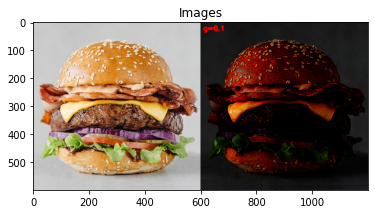

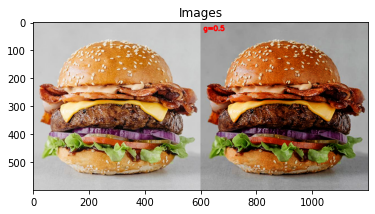

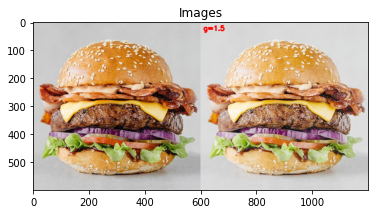

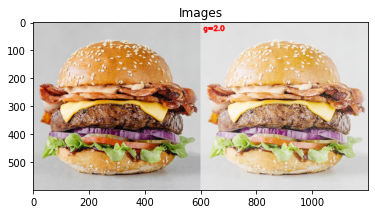

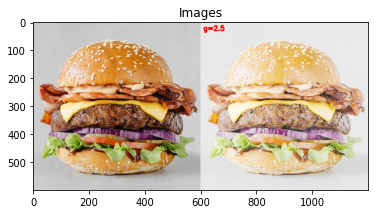

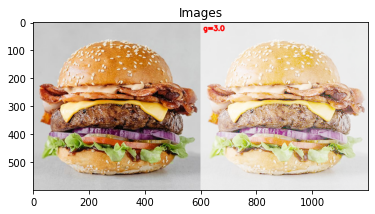

In [ ]:
# load the original image
original = cv2.imread(args["image"])

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue

	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	plt_imshow("Images", np.hstack([original, adjusted]))